In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [134]:
dataset = pd.read_csv('leads emaus campaña formulario de 8 al 11 junio.csv')

In [137]:
dataset.columns = ['id','created_time','ad_id','ad_name','adset_id','adset_name','campaign_id',
                   'campaign_name','form_id','form_name','is_organic',
                   'platform','caja compensación','salario (2-4SM)',
                   'situación laboral','nombre','email','phone_number']

#dataset.info()
#dataset['salario (2-4SM)']

In [158]:



print(respuestas_buenas)
def estandar_caja(dataframe):
    for column in dataframe:
        respuesta='si|con|com|porvenir'
        respuesta_correcta = 'si'
        dataframe.loc[dataframe[column].str.contains(respuestas[i], case=False), column] = respuesta_correcta
        
        return dataframe


['si|com|con', 'no']


In [140]:
#=============================
#remove accents in all columns
#=============================
cols = dataset.select_dtypes(include=[np.object]).columns
dataset[cols] = dataset[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

#==========================================================================================
#chancge S to s and N to n
#dataset.loc[dataset['caja compensación'].str.startswith('s'), 'caja compensación'] = "si"
#standarizing answer: si - no
#df['prod_type'] = df['prod_type'].replace({'respon':'responsive', 'r':'responsive'})
#==========================================================================================
dataset.loc[dataset['caja compensación'].str.contains('si|con|com|porvenir', case=False), 'caja compensación'] = 'si'
dataset.loc[dataset['caja compensación'].str.contains('no', case=False), 'caja compensación'] = 'no'

#==========================================================================================
#standarizing answer: empleado - independiente - pensiondo
#==========================================================================================
dataset.loc[dataset['situación laboral'].str.contains('Em', case=False), 'situación laboral'] = 'empleado'
dataset.loc[dataset['situación laboral'].str.contains('ind|cont|si', case=False), 'situación laboral'] = 'independiente'
dataset.loc[dataset['situación laboral'].str.contains('pen', case=False), 'situación laboral'] = 'pensionado'
dataset.loc[dataset['situación laboral'].str.contains('no', case=False), 'situación laboral'] = 'no aplica'

#==========================================================================================
#standarizing answer: salario minimo 2-4
#==========================================================================================
dataset.loc[dataset['salario (2-4SM)'].str.contains('si|salarios|minimos|2|3|dos', case=False), 'salario (2-4SM)'] = 'si'
dataset.loc[dataset['salario (2-4SM)'].str.contains('no|salario|minimo|1', case=False), 'salario (2-4SM)'] = 'no'

dataset['salario (2-4SM)'].nunique()
#dataset['situación laboral']

2

In [51]:
# replace the matching strings 
#dataset_new = dataset.replace(to_replace ='[sS]i ', value = 'si', regex = True) 
#dataset['caja compensación'] = dataset['caja compensación'].str.replace('Si ', 'si', regex = True)  


In [153]:
#número de afiliados a caja de compensación
afiliados_comp = dataset[dataset['caja compensación']=='si']['id'].nunique()

print(afiliados_comp)
#número de empleados
empleados = dataset[dataset['situación laboral']=='empleado']['id'].nunique()

print(empleados)
#número de leads que satisfacen cond. de salario 
satisfacen_salario = dataset[dataset['salario (2-4SM)']=='si']['id'].nunique()

print(satisfacen_salario)

126
122
76


In [129]:
channel = pd.DataFrame(channel.unstack(level=1)) #unstack cities

#print(channel)

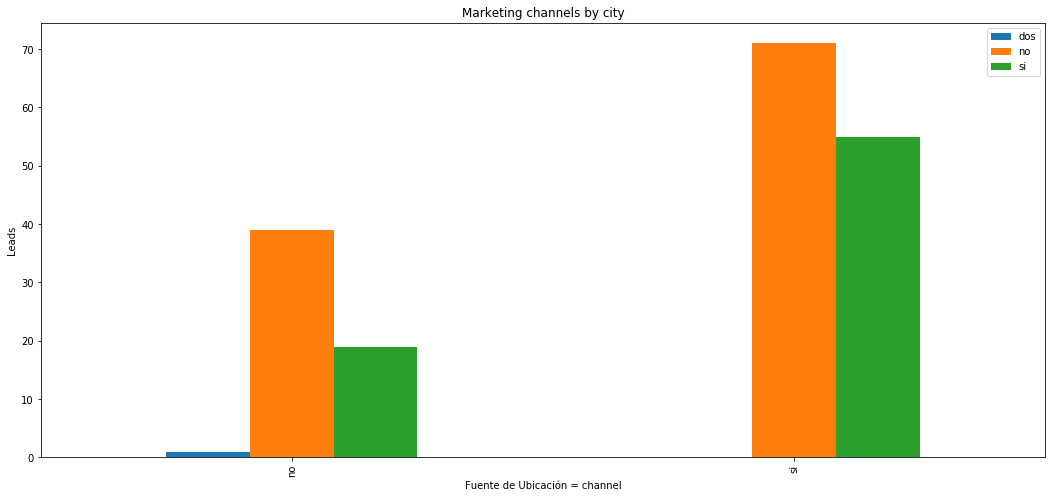

In [130]:
channel.plot(kind='bar',figsize=(18,8))
plt.title("Marketing channels by city")
plt.xlabel('Fuente de Ubicación = channel')
plt.ylabel('Leads')
plt.legend(loc='upper right',labels=channel.columns.values)

In [63]:
date_channel = dataset.groupby(['Fecha de Creación (DD MM YYYY)','Fuente de Ubicación'])['Nombre del Cliente'].count()

In [64]:
date_channel = pd.DataFrame(date_channel.unstack(level=1)) #unstack channels

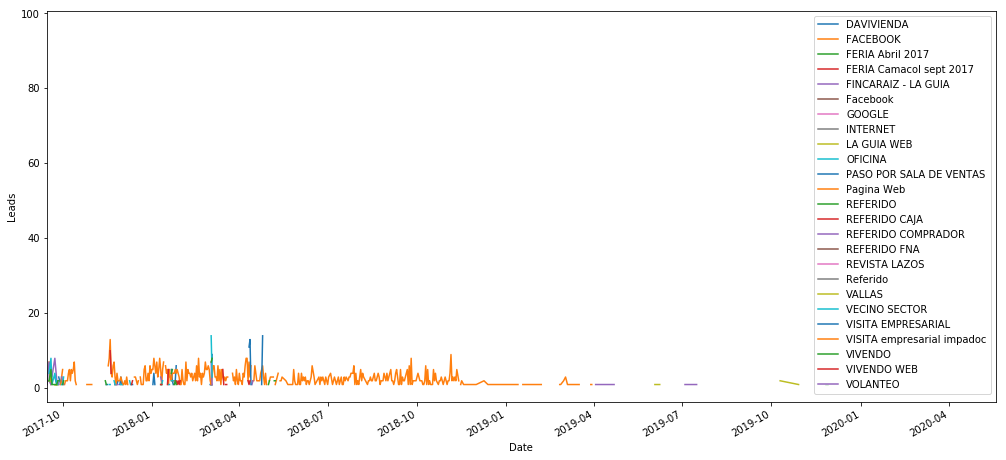

In [65]:
date_channel.plot(kind='line',figsize=(17,8))
plt.xlabel('Date')
plt.ylabel('Leads')
plt.legend(loc='upper right', labels=date_channel.columns.values)
#plt.xtics(rotation=45)


In [88]:
channel_tipocomprador = dataset.groupby(['Fuente de Ubicación','Tipo de comprador'])['Nombre del Cliente'].count()


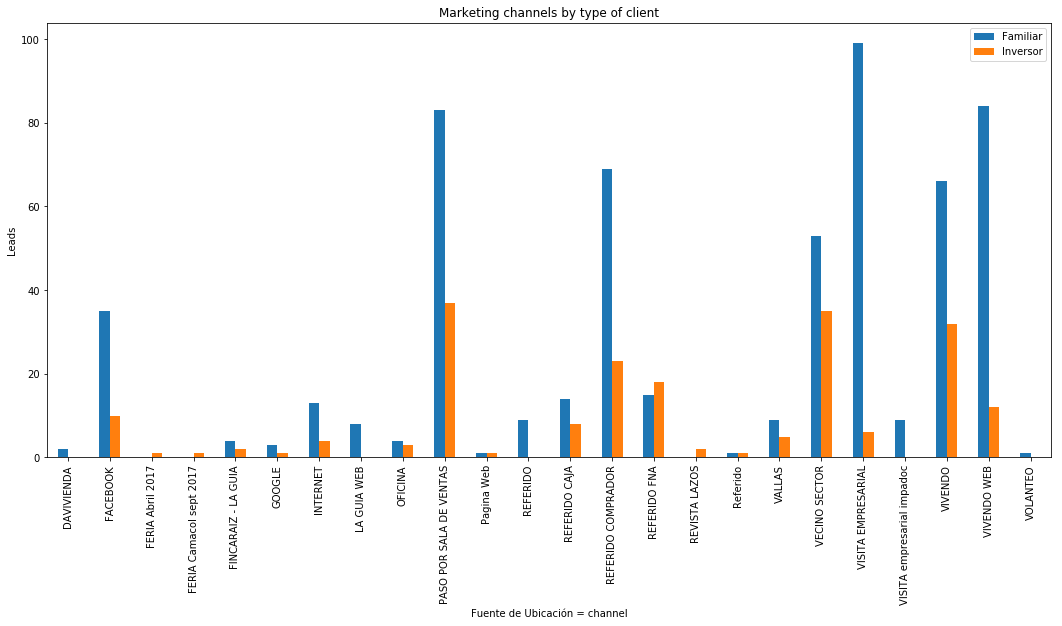

In [89]:
channel_tipocomprador = pd.DataFrame(channel_tipocomprador.unstack(level=1)) #unstack cities
channel_tipocomprador.plot(kind='bar',figsize=(18,8))
plt.title("Marketing channels by type of client")
plt.xlabel('Fuente de Ubicación = channel')
plt.ylabel('Leads')
plt.legend(loc='upper right',labels=channel_tipocomprador.columns.values)

In [90]:
city_tipocomprador = dataset.groupby(['Ciudad','Tipo de comprador'])['Nombre del Cliente'].count()


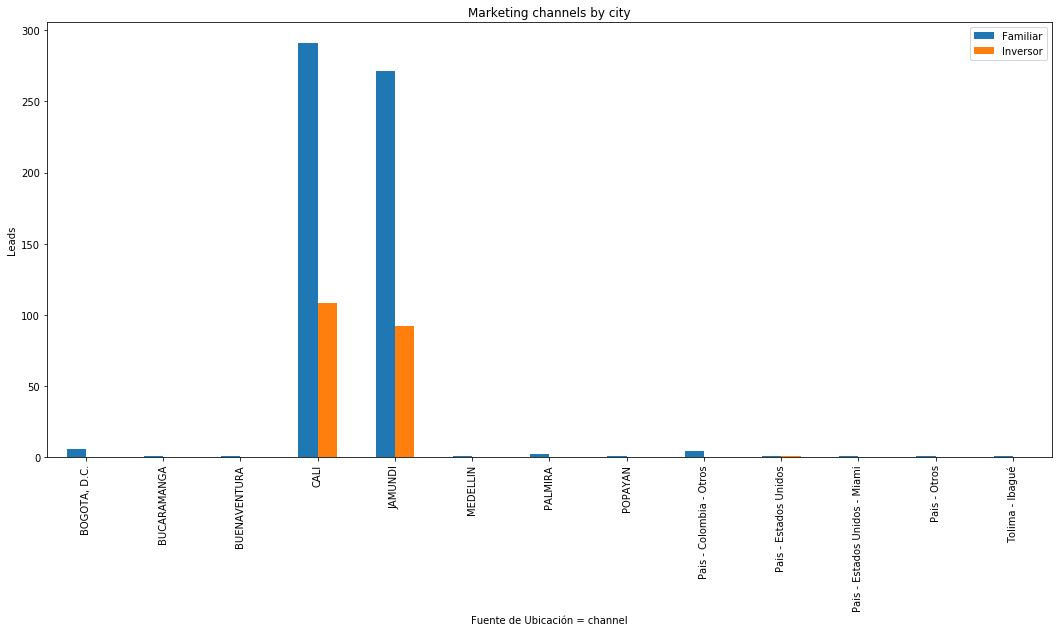

In [91]:
city_tipocomprador = pd.DataFrame(city_tipocomprador.unstack(level=1)) #unstack cities
city_tipocomprador.plot(kind='bar',figsize=(18,8))
plt.title("Marketing channels by city")
plt.xlabel('Fuente de Ubicación = channel')
plt.ylabel('Leads')
plt.legend(loc='upper right',labels=city_tipocomprador.columns.values)

# Importing re package for using regular expressions 
import re 
  
# Function to clean the names 
def Clean_names(answer): 
    # Search for opening bracket in the name followed by 
    # any characters repeated any number of times 
    if re.search('\s.*', answer): 
  
        # Extract the position of beginning of pattern 
        pos = re.search('\s.*', answer).start() 
  
        # return the cleaned name 
        return answer[:pos] 
  
    else: 
        # if clean up needed return the same name 
        return answer 
          
# Updated the city columns 
dataset['caja compensación'] = dataset['caja compensación'].apply(Clean_names) 
  
# Print the updated dataframe 
#print(dataset['caja compensación']) 